# Case 0. Learning basics
**Andrey Verbovskiy**<br>
14.01.2021<br>
Neural Network for Health Technology Applications<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

This exercise combines the codes from two tensorflow examples:

- [Regression](https://www.tensorflow.org/tutorials/keras/regression)
- [Load CSV data](https://www.tensorflow.org/tutorials/load_data/csv).

## Setup

Here is as a first version of the code that imports the needed libraries. You might need to iterate and edit this part several times. 

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


Print out the tensorflow version number, See: [Basic Regression](https://www.tensorflow.org/tutorials/keras/regression)

In [2]:
# Write the print command here
print("tensorflow:", tf.__version__)

tensorflow: 2.3.0


## Dataset

We read in [the abalone dataset](https://archive.ics.uci.edu/ml/datasets/abalone). Here is a ready code for it. Just run it. For more details, see: [Load CSV data](https://www.tensorflow.org/tutorials/load_data/csv)

In [3]:
dataset = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

Print out the first 10 rows of the data. Search for `pandas dataframe head` for more details. 

In [4]:
# Your code
dataset.head(10)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.3340,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.8740,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.0920,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.8790,0.3740,0.1695,0.2300,13
5,0.570,0.450,0.145,0.7510,0.2825,0.2195,0.2215,10
6,0.470,0.360,0.130,0.4720,0.1820,0.1140,0.1500,10
7,0.610,0.450,0.190,1.0805,0.5170,0.2495,0.2935,10
8,0.520,0.425,0.125,0.7900,0.3720,0.2050,0.1900,8
9,0.485,0.390,0.120,0.5990,0.2510,0.1345,0.1690,8


Next we split the dataset into training and test.

In [5]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

How many samples (=rows) are in train and test datasets?<br>
(Tip: Search for `pandas dataframe count`)

In [6]:
# Your code
train_dataset.describe()#2656 rows
test_dataset.describe()#664 rows

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000
mean,0.528750,0.411182,0.142432,0.848757,0.369347,0.185704,0.243715,9.912651
std,0.120982,0.100227,0.056676,0.512770,0.232897,0.114800,0.144429,3.089644
min,0.175000,0.125000,0.040000,0.023500,0.008000,0.003500,0.008000,3.000000
25%,0.450000,0.345000,0.115000,0.438625,0.187625,0.090000,0.130750,8.000000
50%,0.550000,0.425000,0.140000,0.816250,0.345250,0.176000,0.236250,10.000000
75%,0.620000,0.485000,0.170000,1.183125,0.506625,0.260500,0.340000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.641500,0.897000,27.000000


## Split features from labels

Next we split the features (=input) from the labels (=output). [`pandas.DataFrame.pop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html) and [`pandas.DataFrame.copy`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) do that trick.

In [7]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Age')
test_labels = test_features.pop('Age')


## Normalization

We use [the normalization layer](https://www.tensorflow.org/tutorials/keras/regression#the_normalization_layer) to preprocess the data. 

**Note: You might need to add something to your setup!** See the setup for the [Regression](https://www.tensorflow.org/tutorials/keras/regression) for more details.

In [8]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

## DNN regression model

Next we build a [dense neural network (DNN) regression model](https://www.tensorflow.org/tutorials/keras/regression#a_dnn_regression). The model architecture should be the following:

- First layer is the normalization layer (normalizer)
- Second layer should be a Dense layer having 64 elements, activation function of 'relu'
- Third layer should be a Dense layer having 8 elements and activation function of 'relu'
- Last layer should be a Dense layer having 1 element

**Add the missing second and third layers to the model.**

The loss function and optimizer are already given, so you need not to change them.

In [11]:
# Add to the model the missing layers
model = keras.Sequential([
      normalizer,
      layers.Dense(64,activation= 'relu'),
      layers.Dense(8,'relu'),
      layers.Dense(1)])

# Don't change the compilation
model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

Print out the model summary, see: [Full model](https://www.tensorflow.org/tutorials/keras/regression#full_model).

In [12]:
# Your code
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 7)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,056
Trainable params: 1,041
Non-trainable params: 15
_________________________________________________________________


*Bonus*: Experiment what libraries are needed to install and setup in order that the following code works. More info: [plot_model](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model)

In [14]:
# Bonus: take the comment away and run, you might need some extra installations
#plot_model(model)

## Training

Now we are ready to train our model. The following code:

- watches how long time does the training take (`%%time`)
- trains the model 100 times (`epochs = 100`) with the given training features and labels
- suppress all intermediate printings (`verbose = 0`)
- splits the training data to 80% for training and 20% for validation (`validation_split = 0.2`), and
- stores the training history (`history = ...`)


In [15]:
%%time
history = model.fit(train_features, train_labels,
                   epochs = 100,
                   verbose = 0,
                   validation_split = 0.2)

Wall time: 4.32 s


Write a function that takes as an input argument the history and plots the error (=loss) vs epochs. Search for how the `def plot_loss` has been implemented in the [regression example](https://www.tensorflow.org/tutorials/keras/regression). 

In [41]:
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'],label = 'val_loss')
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('Error[AGE]')

Now we are ready to plot the training history.

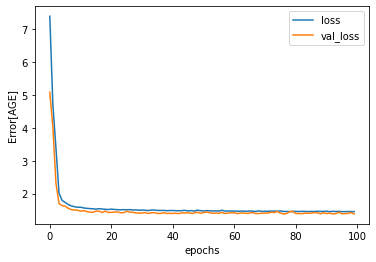

In [42]:
plot_loss(history)

*Note*: Check that the y-axis label is correct. In this model we try to predict 'Age', not miles per gallon (MPG) as in the regression example...

## Evaluation and Performance

Finally we evaluate the model with the test features and labels. `model.evaluate` calculates the Mean absolute error (=loss) for the test dataset.

In [43]:
test_results = model.evaluate(test_features, test_labels, verbose=0)

Print out the evaluation results. Show three (3) decimals places for the error. See [How to print a float with two decimal places in Python](https://www.kite.com/python/answers/how-to-print-a-float-with-two-decimal-places-in-python).

In [53]:
# Your code
test_results_3_dec = "{:.3f}".format(test_results)
test_results_3_dec

'1.553'

Lastly we use the trained model to predict the results for the test features. [`numpy.flatten`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html) collapses the array into one dimension.

In [54]:
test_predictions = model.predict(test_features).flatten()

In this last code snippet you should add a scatter plot of the predicted values (`test_predictions`) vs. the real values (`test_labels`) and decorate the graphics with x- and y-labels. For more details see [Make predictions](https://www.tensorflow.org/tutorials/keras/regression#make_predictions).

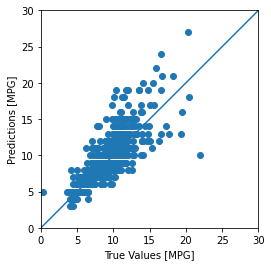

In [60]:
a = plt.axes(aspect='equal')

plt.scatter(test_predictions, test_labels)

plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')


lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.show()

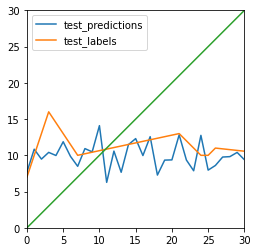

In [58]:
a = plt.axes(aspect='equal')

plt.plot(test_predictions, label = 'test_predictions')
plt.plot(test_labels, label = 'test_labels')


plt.legend()

lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)
plt.show()